In [9]:
import pandas as pd
from glob import glob
import seaborn as sns
import matplotlib.pyplot as plt

In [65]:
files = (
    glob("/Users/jroberts/GitHub/WorldCupPrediction/wcpredictor/scripts/likelihood_scan_1668528923/*")
    + glob("/Users/jroberts/GitHub/WorldCupPrediction/wcpredictor/scripts/likelihood_scan_1668535471/*")
    + glob("/Users/jroberts/GitHub/WorldCupPrediction/wcpredictor/scripts/likelihood_scan_1668536421/*")
)

# /Users/jroberts/GitHub/WorldCupPrediction/wcpredictor/scripts/likelihood_scan_1668528923 (2018)
# /Users/jroberts/GitHub/WorldCupPrediction/wcpredictor/scripts/likelihood_scan_1668535471 (2014)
# /Users/jroberts/GitHub/WorldCupPrediction/wcpredictor/scripts/likelihood_scan_1668536421 (2010)

In [75]:
df = pd.concat([pd.read_csv(f) for f in files if ".model" not in f and ".json" not in f])
df.reset_index(drop=True, inplace=True)
df

,epsilon,world_cup_weight,likelihood_W
0,0.6,1.5,-2.800716
1,0.1,1.5,-2.807630
2,0.1,2.0,-2.810392
3,0.5,2.5,-2.800901
4,0.3,2.5,-2.799590
...,...,...,...
142,0.4,3.0,-2.694186
143,0.4,3.5,-2.693451
144,0.3,1.0,-2.698287
145,0.1,1.0,-2.711119


In [76]:
df = df.groupby(["epsilon", "world_cup_weight"])["likelihood_W"].sum().unstack()

<AxesSubplot: xlabel='world_cup_weight', ylabel='epsilon'>

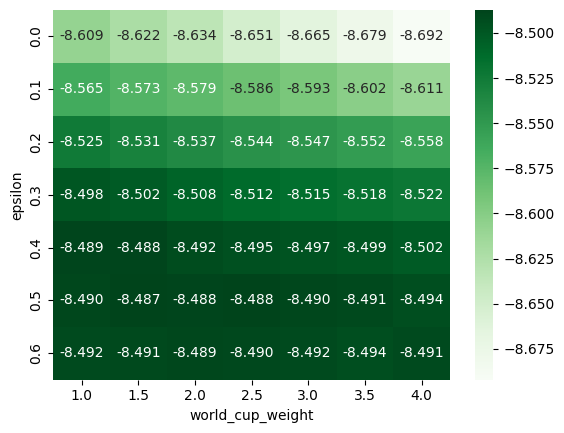

In [78]:
sns.heatmap(
    df, ##df[["likelihood_W"]]
    #.set_index([df["epsilon"], df["world_cup_weight"]])
    #.unstack(),
    cmap="Greens",
    annot=True,
    fmt=".3f"
)

In [79]:
df[df["epsilon"] == 0.6].drop("epsilon", axis=1).set_index("world_cup_weight").plot(
    marker="o", linestyle="None"
)

KeyError: 'epsilon'

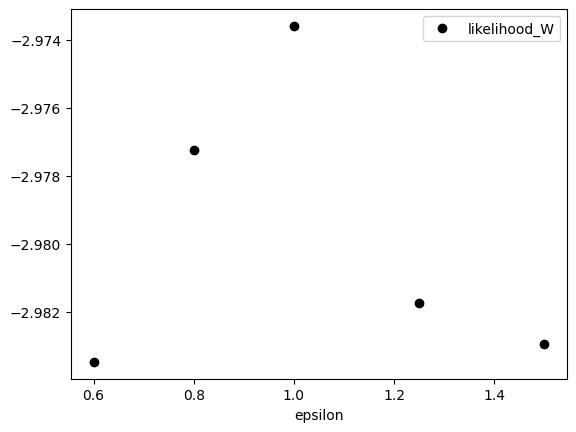

In [57]:
df[df["world_cup_weight"] == 4].drop("world_cup_weight", axis=1).set_index("epsilon")[
    "likelihood_W"
].plot(color="k", marker="o", linestyle="None")
plt.legend()

In [80]:
df.iloc[df.drop(["epsilon", "world_cup_weight"], axis=1).idxmax().values]

KeyError: "['epsilon', 'world_cup_weight'] not found in axis"

In [88]:
df.max().max()
df[df == df.max().max()]

world_cup_weight,1.0,1.5,2.0,2.5,3.0,3.5,4.0
epsilon,,,,,,,
0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0.5,NaN,-8.487261,NaN,NaN,NaN,NaN,NaN
0.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [86]:
df == df.max().max()

world_cup_weight,1.0,1.5,2.0,2.5,3.0,3.5,4.0
epsilon,,,,,,,
0.0,False,False,False,False,False,False,False
0.1,False,False,False,False,False,False,False
0.2,False,False,False,False,False,False,False
0.3,False,False,False,False,False,False,False
0.4,False,False,False,False,False,False,False
0.5,False,True,False,False,False,False,False
0.6,False,False,False,False,False,False,False
